In [1]:
pwd

'/home/16011015/notebooks/SRON-DCGAN/notebooks'

In [2]:
cd gan_data/training_progress/

/home/16011015/notebooks/SRON-DCGAN/notebooks/gan_data/training_progress


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

import time


import matplotlib.pyplot as plt

from tqdm import tqdm

from IPython.display import clear_output



%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [4]:
path = '//gan_data//training_progress//'

In [5]:
pwd

'/home/16011015/notebooks/SRON-DCGAN/notebooks/gan_data/training_progress'

In [16]:
def plot_progress():
    n = 5000 # 5000, plot every n-th point

    DGz = pd.DataFrame(arrays[0])
    Dx = pd.DataFrame(arrays[1])

    DGz = DGz.rolling(n).mean()
    Dx = Dx.rolling(n).mean()


    plt.figure(figsize=(10,5))

    plt.plot(DGz, '-', label='D(G(z))', c='r', alpha=0.8)
    plt.plot(Dx, '-', label='D(x)', c='b', alpha=0.8)
    
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7)

    plt.xlabel('iters')


    plt.legend(loc='lower left', bbox_to_anchor= (1, 0.88), borderaxespad=0, frameon=False)

    #z = 10 # plot epoch bar every z epochs
    #batches_per_epoch = 79
    #for i in range(len(DGz)):
    #        if (i!=0) and (i % (batches_per_epoch*z) == 0):
    #            plt.axvline(x=i,  color='black', linestyle='--', alpha=1)
    
    # D:2 -> D:4
    plt.axvline(x=35000,  color='black', linestyle='--', alpha=1)
    
    # Training restarted after it crashed overnight
    plt.axvline(x=128000,  color='black', linestyle='--', alpha=1)
    
    # D4 -> D2
    plt.axvline(x=1400000,  color='black', linestyle='--', alpha=1)
    
    # Terminal got shutdown overnight
    plt.axvline(x=2.23e6,  color='black', linestyle='--', alpha=1)
    
    # Repo cleaned, weights moved & train/test changed to ASPA v2 dataset, using 500k train G1 D2
    plt.axvline(x=2.593e6,  color='black', linestyle='--', alpha=1)
    
    # Crashed overnight
    plt.axvline(x=2.918e6,  color='black', linestyle='--', alpha=1)
    
    plt.xlim(left=2.5e6)
    plt.grid()
    plt.show()

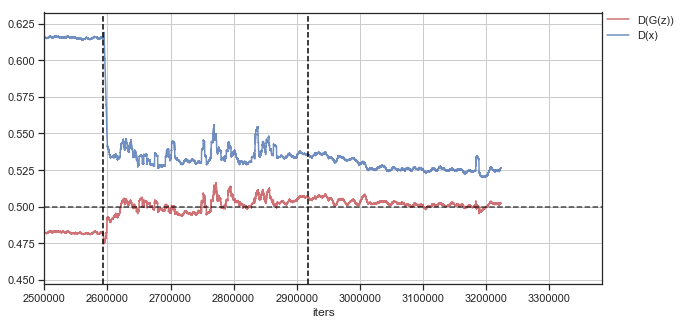

In [ ]:
while True:
    variable_names = ['d_fake', 'd_real']
    arrays = []

    """Load data"""
    for name in variable_names:
        arrays.append(np.loadtxt(name+'_test.txt'))
        
    """Plot progress"""
    clear_output()
    plot_progress()
    
    time.sleep(5)